In [3]:
import pandas as pd

import os

In [4]:
# presentazione problema : obiettivo grafico inspiegabile


In [5]:
#check data
file = "knownResults_A.txt"
df_tmp = pd.read_table(file)

print(df_tmp.shape)
print(df_tmp.info())
df_tmp.head() ##attenzione a cosa è object, perché?

(414, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
Motif Name                                         414 non-null object
Consensus                                          414 non-null object
P-value                                            414 non-null object
Log P-value                                        414 non-null float64
q-value (Benjamini)                                414 non-null float64
# of Target Sequences with Motif(of 27195)         414 non-null float64
% of Target Sequences with Motif                   414 non-null object
# of Background Sequences with Motif(of 169962)    414 non-null float64
% of Background Sequences with Motif               414 non-null object
dtypes: float64(4), object(5)
memory usage: 29.2+ KB
None


,Motif Name,Consensus,P-value,Log P-value,q-value (Benjamini),# of Target Sequences with Motif(of 27195),% of Target Sequences with Motif,# of Background Sequences with Motif(of 169962),% of Background Sequences with Motif
0,CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,AYAGTGCCMYCTRGTGGCCA,1e-4640,-10690.0,0.0,5216.0,19.18%,1801.6,1.06%
1,Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer,NNATGASTCATH,1e-4226,-9732.0,0.0,8301.0,30.52%,7843.7,4.59%
2,Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,DATGASTCATHN,1e-4131,-9513.0,0.0,8881.0,32.65%,9518.9,5.57%
3,JunB(bZIP)/DendriticCells-Junb-ChIP-Seq(GSE360...,RATGASTCAT,1e-4054,-9336.0,0.0,8198.0,30.14%,8027.5,4.70%
4,BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer,DATGASTCAT,1e-4045,-9315.0,0.0,8772.0,32.25%,9480.4,5.55%


In [6]:
#check the files
for filepath in os.listdir():
    print(filepath)

.ipynb_checkpoints
knownResults_A.txt
knownResults_B.txt
knownResults_C.txt
knownResults_D.txt
knownResults_E.txt
knownResults_F.txt
knownResults_G.txt
knownResults_H.txt
myplot.pdf
myplot.png
plotHomer.ipynb


5

In [13]:
#process in an dict of dataframes

dfs={}

for filepath in os.listdir():
    if filepath.startswith('known'):
        cla = filepath.split("_")[-1].split(".")[0]
        dfs[cla] = pd.read_table(filepath)
        dfs[cla] = dfs[cla].applymap(lambda s: s.strip('%') if type(s)==str else s) ##tante cose
        dfs[cla]['% of Target Sequences with Motif'] = dfs[cla]['% of Target Sequences with Motif'].astype(float)
        dfs[cla]['% of Background Sequences with Motif'] = dfs[cla]['% of Background Sequences with Motif'].astype(float)
        
        dfs[cla].index = dfs[cla]['Motif Name']
dfs['A'].head()

,Motif Name,Consensus,P-value,Log P-value,q-value (Benjamini),# of Target Sequences with Motif(of 27195),% of Target Sequences with Motif,# of Background Sequences with Motif(of 169962),% of Background Sequences with Motif
Motif Name,,,,,,,,,
CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,AYAGTGCCMYCTRGTGGCCA,1e-4640,-10690.0,0.0,5216.0,19.18,1801.6,1.06
Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer,Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer,NNATGASTCATH,1e-4226,-9732.0,0.0,8301.0,30.52,7843.7,4.59
Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,DATGASTCATHN,1e-4131,-9513.0,0.0,8881.0,32.65,9518.9,5.57
JunB(bZIP)/DendriticCells-Junb-ChIP-Seq(GSE36099)/Homer,JunB(bZIP)/DendriticCells-Junb-ChIP-Seq(GSE360...,RATGASTCAT,1e-4054,-9336.0,0.0,8198.0,30.14,8027.5,4.70
BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer,BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer,DATGASTCAT,1e-4045,-9315.0,0.0,8772.0,32.25,9480.4,5.55


In [14]:
#we are interested in : fold ratio, q-value -- Motif Name
for key in dfs:
    dfs[key]['foldratio'] = dfs[key]['% of Target Sequences with Motif']/dfs[key]['% of Background Sequences with Motif']
    
dfs['A'].head()

,Motif Name,Consensus,P-value,Log P-value,q-value (Benjamini),# of Target Sequences with Motif(of 27195),% of Target Sequences with Motif,# of Background Sequences with Motif(of 169962),% of Background Sequences with Motif,foldratio
Motif Name,,,,,,,,,,
CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,AYAGTGCCMYCTRGTGGCCA,1e-4640,-10690.0,0.0,5216.0,19.18,1801.6,1.06,18.094340
Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer,Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer,NNATGASTCATH,1e-4226,-9732.0,0.0,8301.0,30.52,7843.7,4.59,6.649237
Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,DATGASTCATHN,1e-4131,-9513.0,0.0,8881.0,32.65,9518.9,5.57,5.861759
JunB(bZIP)/DendriticCells-Junb-ChIP-Seq(GSE36099)/Homer,JunB(bZIP)/DendriticCells-Junb-ChIP-Seq(GSE360...,RATGASTCAT,1e-4054,-9336.0,0.0,8198.0,30.14,8027.5,4.70,6.412766
BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer,BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer,DATGASTCAT,1e-4045,-9315.0,0.0,8772.0,32.25,9480.4,5.55,5.810811


In [18]:
#ex: creare una colonna con la classe (tra parentesi nel motif name)
for k in dfs:
    dfs[k]['TF'] = dfs[k]['Motif Name'].apply(lambda x: x.split(')')[0].split('(')[-1])
dfs['F']

,Motif Name,Consensus,P-value,Log P-value,q-value (Benjamini),# of Target Sequences with Motif(of 3994),% of Target Sequences with Motif,# of Background Sequences with Motif(of 193728),% of Background Sequences with Motif,foldratio,TF
Motif Name,,,,,,,,,,,
CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,AYAGTGCCMYCTRGTGGCCA,0.000000e+00,-1720.000000,0.0,856.0,21.43,2421.6,1.25,17.144000,Zf
BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer,BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer,CNNBRGCGCCCCCTGSTGGC,0.000000e+00,-1257.000000,0.0,872.0,21.83,4533.3,2.34,9.329060,Zf
Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer,Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer,NNATGASTCATH,0.000000e+00,-891.800000,0.0,865.0,21.65,7121.3,3.67,5.899183,bZIP
Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,DATGASTCATHN,0.000000e+00,-873.900000,0.0,936.0,23.43,8708.9,4.49,5.218263,bZIP
Fra2(bZIP)/Striatum-Fra2-ChIP-Seq(GSE43429)/Homer,Fra2(bZIP)/Striatum-Fra2-ChIP-Seq(GSE43429)/Homer,GGATGACTCATC,0.000000e+00,-860.600000,0.0,804.0,20.13,6279.7,3.24,6.212963,bZIP
BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer,BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer,DATGASTCAT,0.000000e+00,-847.400000,0.0,917.0,22.95,8609.7,4.44,5.168919,bZIP
JunB(bZIP)/DendriticCells-Junb-ChIP-Seq(GSE36099)/Homer,JunB(bZIP)/DendriticCells-Junb-ChIP-Seq(GSE360...,RATGASTCAT,0.000000e+00,-845.100000,0.0,847.0,21.20,7233.6,3.73,5.683646,bZIP
AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer,AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer,VTGACTCATC,0.000000e+00,-793.600000,0.0,959.0,24.01,10157.4,5.24,4.582061,bZIP
Fosl2(bZIP)/3T3L1-Fosl2-ChIP-Seq(GSE56872)/Homer,Fosl2(bZIP)/3T3L1-Fosl2-ChIP-Seq(GSE56872)/Homer,NATGASTCABNN,0.000000e+00,-789.800000,0.0,668.0,16.72,4519.7,2.33,7.175966,bZIP


In [21]:
s = []
foldratio = 2.5
for k in sorted(dfs.keys()):
    s.append(dfs[k][dfs[k]['foldratio'] > foldratio]['q-value (Benjamini)'])
    
pd.DataFrame(s)

,AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer,Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,Atf4(bZIP)/MEF-Atf4-ChIP-Seq(GSE35681)/Homer,BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer,BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer,Bach1(bZIP)/K562-Bach1-ChIP-Seq(GSE31477)/Homer,Bach2(bZIP)/OCILy7-Bach2-ChIP-Seq(GSE44420)/Homer,CEBP:CEBP(bZIP)/MEF-Chop-ChIP-Seq(GSE35681)/Homer,CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,CTCF-SatelliteElement(Zf?)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,...,TEAD(TEA)/Fibroblast-PU.1-ChIP-Seq(Unpublished)/Homer,TEAD2(TEA)/Py2T-Tead2-ChIP-Seq(GSE55709)/Homer,X-box(HTH)/NPC-H3K4me1-ChIP-Seq(GSE16256)/Homer,ZFP3(Zf)/HEK293-ZFP3.GFP-ChIP-Seq(GSE58341)/Homer,ZNF16(Zf)/HEK293-ZNF16.GFP-ChIP-Seq(GSE58341)/Homer,ZNF165(Zf)/WHIM12-ZNF165-ChIP-Seq(GSE65937)/Homer,ZNF382(Zf)/HEK293-ZNF382.GFP-ChIP-Seq(GSE58341)/Homer,ZNF652/HepG2-ZNF652.Flag-ChIP-Seq(Encode)/Homer,p53(p53)/mES-cMyc-ChIP-Seq(GSE11431)/Homer,p73(p53)/Trachea-p73-ChIP-Seq(PRJNA310161)/Homer
q-value (Benjamini),0.0,0.0,NaN,0.0,0.0,0.0000,0.0,NaN,0.0,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q-value (Benjamini),0.0,0.0,NaN,0.0,0.0,0.0000,0.0,NaN,0.0,0.0000,...,NaN,NaN,NaN,0.6040,NaN,NaN,NaN,NaN,NaN,NaN
q-value (Benjamini),0.0,0.0,0.0003,0.0,0.0,0.0048,0.0,NaN,0.0,0.2916,...,NaN,NaN,0.0000,NaN,0.4738,0.0222,NaN,NaN,0.0997,0.1215
q-value (Benjamini),0.0,0.0,NaN,0.0,0.0,0.0000,0.0,NaN,0.0,0.0740,...,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q-value (Benjamini),0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0258,...,0.0,0.0,NaN,0.2096,NaN,NaN,NaN,NaN,NaN,NaN
q-value (Benjamini),0.0,0.0,NaN,0.0,0.0,0.0000,0.0,NaN,0.0,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q-value (Benjamini),0.0,0.0,0.0514,0.0,0.0,0.0040,0.0,NaN,0.0,NaN,...,NaN,NaN,0.3593,NaN,NaN,NaN,0.9249,0.07,0.7774,NaN
q-value (Benjamini),0.0,0.0,NaN,0.0,0.0,0.0000,0.0,NaN,0.0,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
pd.DataFrame(s).T

,q-value (Benjamini),q-value (Benjamini),q-value (Benjamini),q-value (Benjamini),q-value (Benjamini),q-value (Benjamini),q-value (Benjamini),q-value (Benjamini)
AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
Atf4(bZIP)/MEF-Atf4-ChIP-Seq(GSE35681)/Homer,NaN,NaN,0.0003,NaN,NaN,0.0000,0.0514,NaN
BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
Bach1(bZIP)/K562-Bach1-ChIP-Seq(GSE31477)/Homer,0.0,0.0000,0.0048,0.0,0.0000,0.0000,0.0040,0.0000
Bach2(bZIP)/OCILy7-Bach2-ChIP-Seq(GSE44420)/Homer,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
CEBP:CEBP(bZIP)/MEF-Chop-ChIP-Seq(GSE35681)/Homer,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN
CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
CTCF-SatelliteElement(Zf?)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,0.0,0.0000,0.2916,0.0,0.0740,0.0258,NaN,0.0000


In [23]:
classes = sorted(dfs.keys())
classes

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

In [24]:
data = pd.DataFrame(s).T
data.columns = classes

data

,A,B,C,D,E,F,G,H
AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
Atf4(bZIP)/MEF-Atf4-ChIP-Seq(GSE35681)/Homer,NaN,NaN,0.0003,NaN,0.0000,NaN,0.0514,NaN
BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
Bach1(bZIP)/K562-Bach1-ChIP-Seq(GSE31477)/Homer,0.0,0.0000,0.0048,0.0000,0.0000,0.0000,0.0040,0.0
Bach2(bZIP)/OCILy7-Bach2-ChIP-Seq(GSE44420)/Homer,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
CEBP:CEBP(bZIP)/MEF-Chop-ChIP-Seq(GSE35681)/Homer,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN
CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
CTCF-SatelliteElement(Zf?)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer,0.0,0.0000,0.2916,0.0740,0.0258,0.0000,NaN,0.0


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
plt.figure()

In [34]:
plt.figure(figsize=(20,20))

In [31]:
sns.heatmap(data)

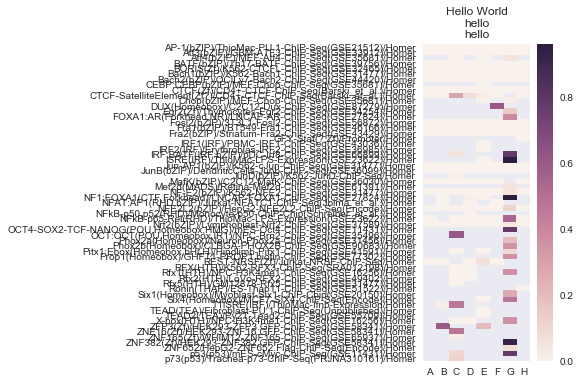

In [57]:
sns.heatmap(data)
plt.title('Hello World\nhello\nhello')
plt.tight_layout()

plt.show()

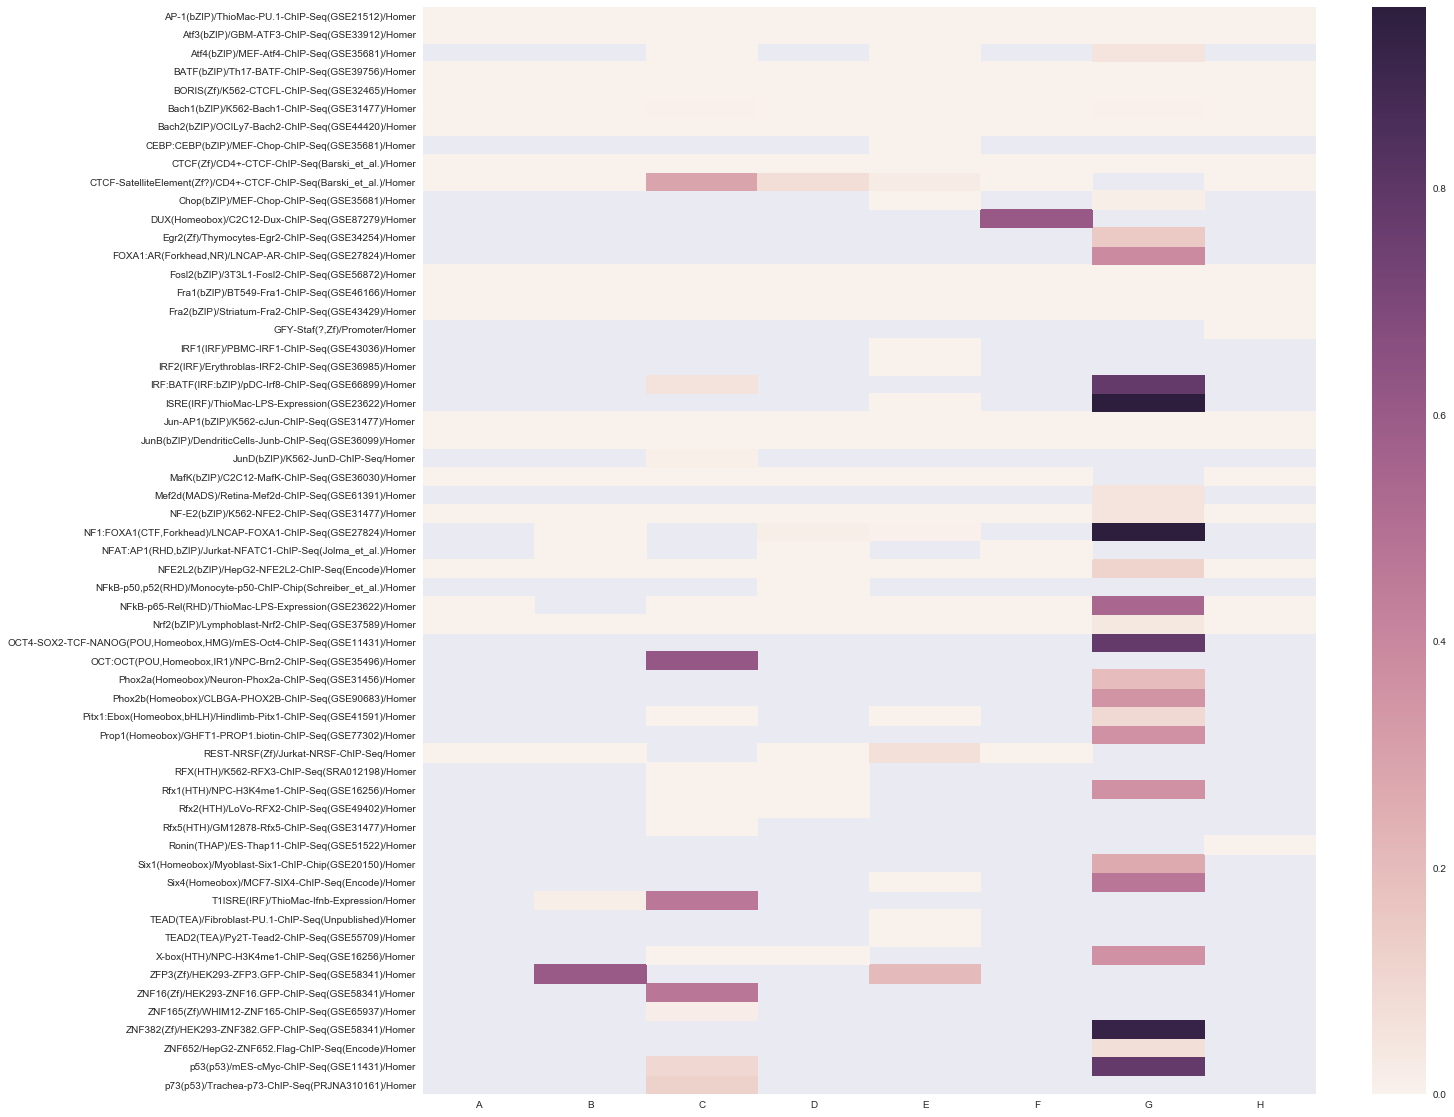

In [35]:
### colori giusti?
    # cmap
### perche' la doppia barra?
plt.close()
sns.heatmap(data)
plt.show()

### heatmap scollegata da ciò che viene mostrato da show (cioe' una delle figures, vuote)

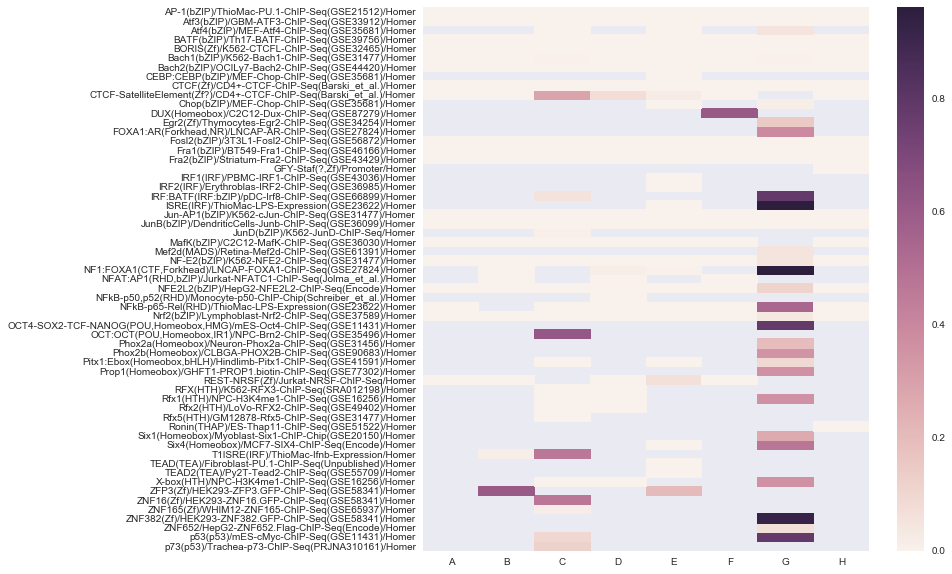

In [36]:
#l'importante è fare le cose con ordine, creo la base su cui disegnare e poi disegno. Oppure posso specificare con Ax
plt.close()
fig=plt.figure(figsize=(10,10))
sns.heatmap(data)
plt.show()

In [37]:
sns.heatmap?

#

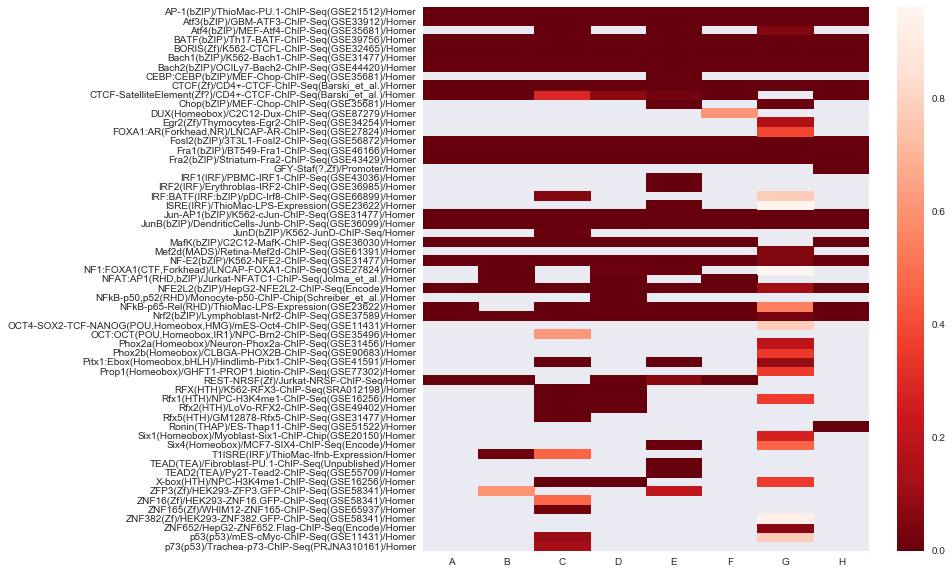

In [41]:
#### intanto lavoriamo sull'immagine, cmap
plt.close()
fig=plt.figure(figsize=(10,10))
sns.heatmap(data,
            cmap='Reds_r')
plt.show()

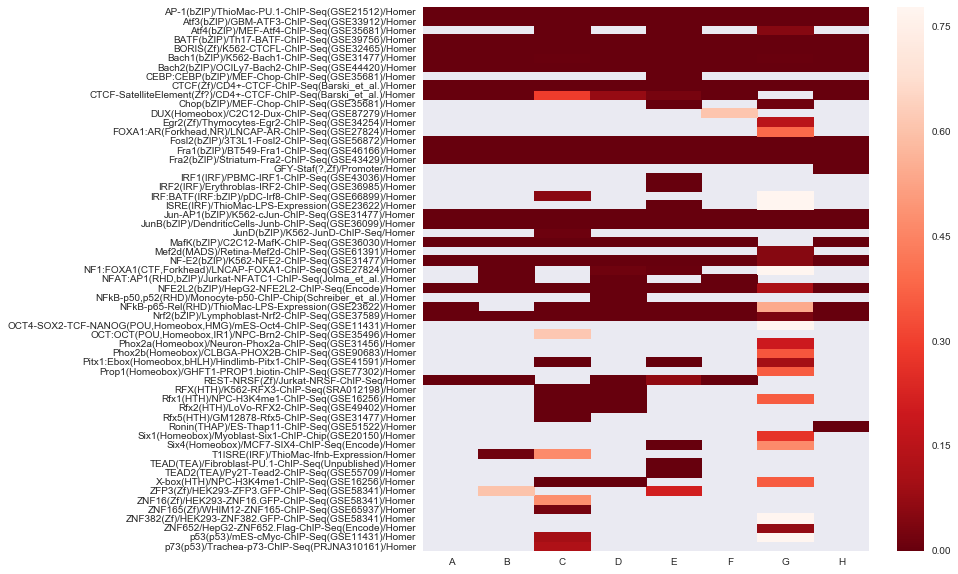

In [42]:
#### intanto lavoriamo sull'immagine, range di colori
plt.close()
fig=plt.figure(figsize=(10,10))
sns.heatmap(data,
            cmap='Reds_r',
           robust=True)
plt.show()

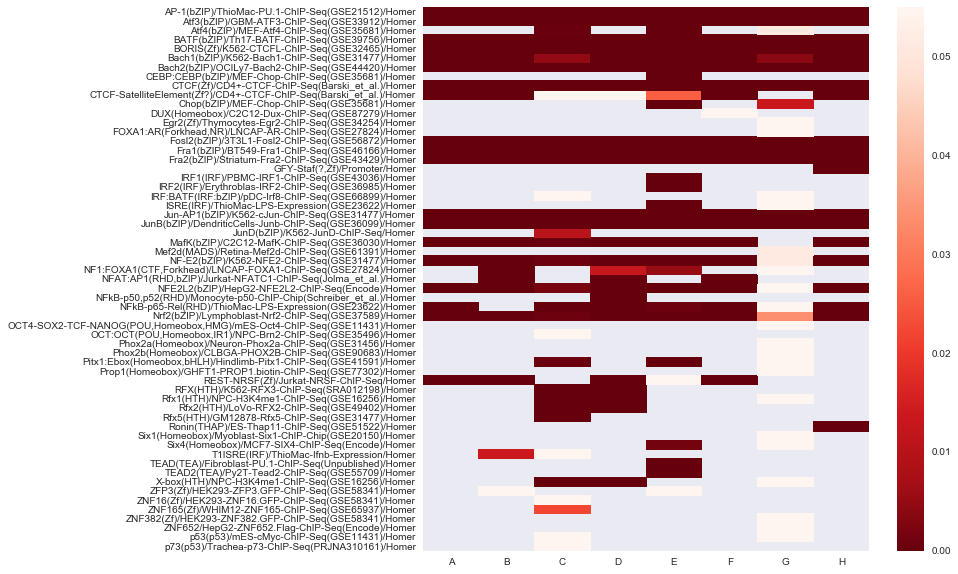

In [43]:
#### intanto lavoriamo sull'immagine, range di colori (robust non va bene)
plt.close()
fig=plt.figure(figsize=(10,10))
sns.heatmap(data,
            cmap='Reds_r',
            vmax = 0.055,) #cheat!
plt.show()

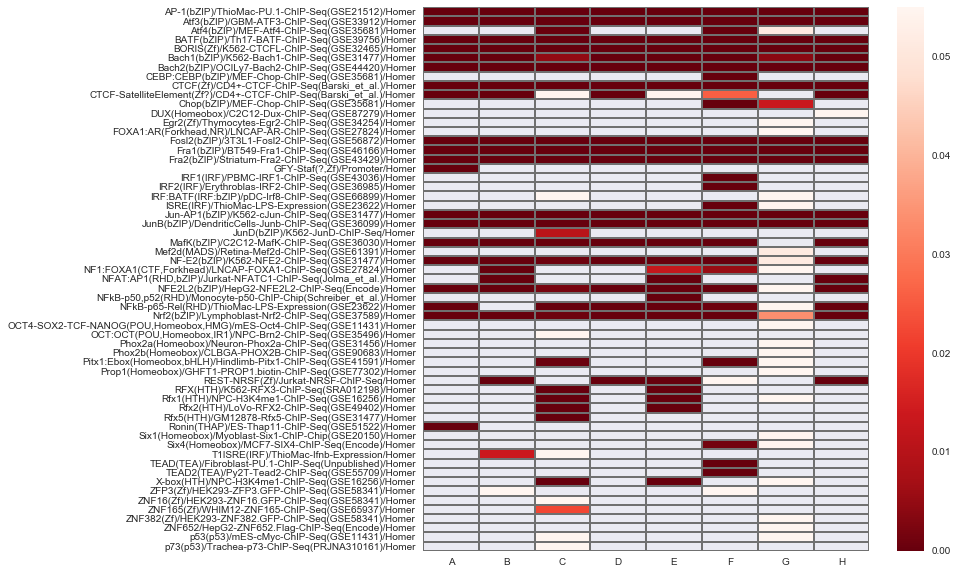

In [90]:
#### intanto lavoriamo sull'immagine, abbelliamo
plt.close()
fig=plt.figure(figsize=(10,10))
sns.heatmap(data,
            cmap='Reds_r',
            vmax = 0.055,
               lw = 1,
           linecolor='#707070')
plt.show()

In [91]:
OUT = 'myplot'
plt.savefig(f'{OUT}.pdf')
plt.savefig(f'{OUT}.png', ppi=300)
#questo non funziona

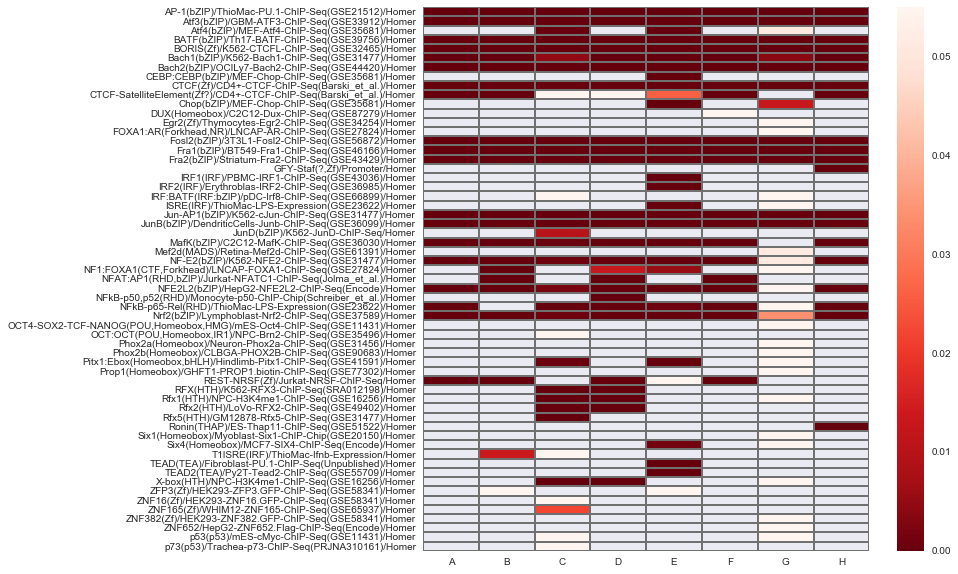

In [44]:
#### questo si
plt.close()
fig=plt.figure(figsize=(10,10))
sns.heatmap(data,
            cmap='Reds_r',
            vmax = 0.055,
               lw = 1,
           linecolor='#707070')

plt.savefig('myplot.pdf')
plt.savefig('myplot.png', ppi=300)
plt.show()

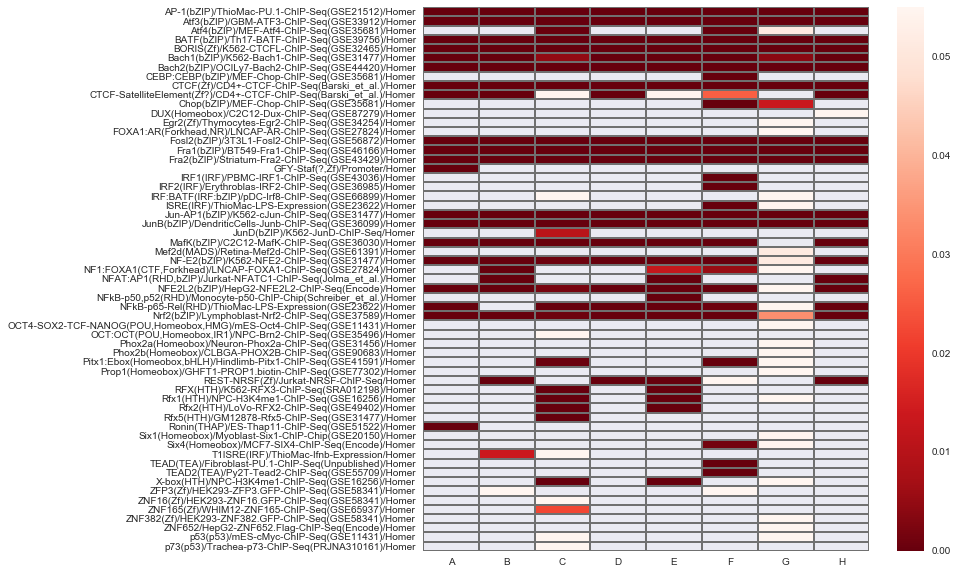

In [93]:
plt.close()
fig, ax = plt.subplots(1, figsize=(10,10))

sns.heatmap(data,
            cmap='Reds_r',
            vmax = 0.055,
               lw = 1,
           linecolor='#707070',
           ax=ax)

plt.show()
##questo ci serve principalmente se vogliamo plottare più riquadri insieme
# in realtà c'è un livello intermedio tra figura e plot, l'AX (plurale AXES)

In [ ]:
##distribuzione qvalues per ogni classe (griglia di plots)


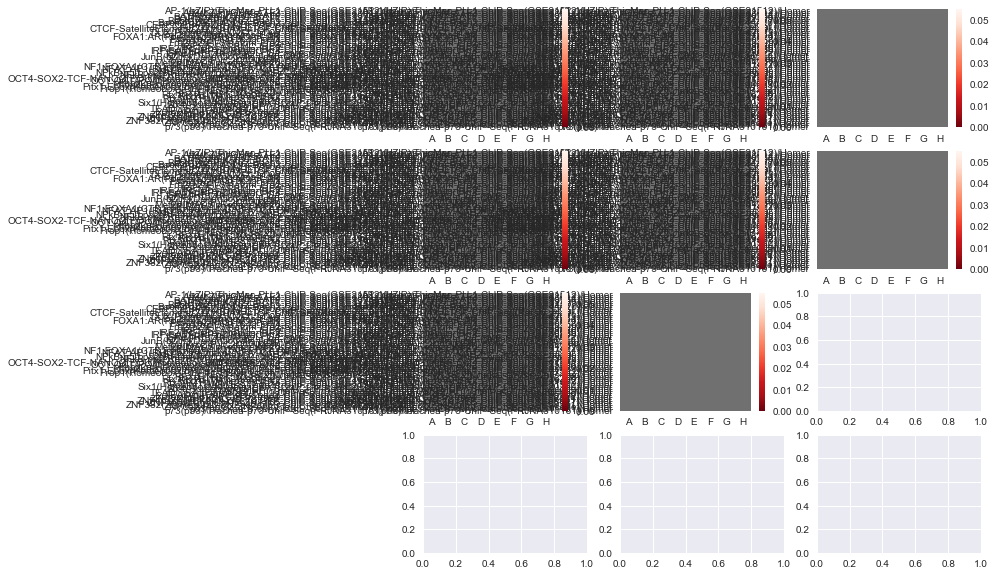

In [51]:
plt.close()
col = 3
fig, ax = plt.subplots(4,col, figsize=(10,10))

for i in range(8):
    sns.heatmap(data,
            cmap='Reds_r',
            vmax = 0.055,
               lw = 1,
           linecolor='#707070',
           ax=ax[i//col][i%col])

plt.show()
##questo ci serve principalmente se vogliamo plottare più riquadri insieme
# in realtà c'è un livello intermedio tra figura e plot, l'AX (plurale AXES)